# Случайные марковские процессы

— Скачайте текст войны и мир https://drive.google.com/drive/u/0/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [3]:
pip install "hmmlearn==0.2.3"

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import hmmlearn
from hmmlearn.hmm import GaussianHMM
import re
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                  
warnings.filterwarnings('ignore')

Заменим ё на е

In [9]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text1 = f.read().lower()
    
with open('tom_2.txt', 'r', encoding='utf-8') as f:
    text2 = f.read().lower()
    
with open('tom_3.txt', 'r', encoding='utf-8') as f:
    text3 = f.read().lower()
    
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text4= f.read().lower()
    
all_text = text1+text2+text3+text4


text = re.sub('[^а-я| ]','', all_text)
text = re.sub('ё','е', text)

In [10]:
# Очистим текст, оставив только русские буквы и символы пробела.
a = ord('а')
RUSSIAN = ''.join([chr(i) for i in range(a,a+32)])
RUSSIAN_whitespace = RUSSIAN + ' '
POS = {l: i for i, l in enumerate(RUSSIAN_whitespace)}

In [11]:
# Создадим нулевую матрицу
probabilities = np.zeros((len(RUSSIAN_whitespace), len(RUSSIAN_whitespace)))

In [12]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]]+=1

In [13]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [14]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN_whitespace), columns=(c for c in RUSSIAN_whitespace))

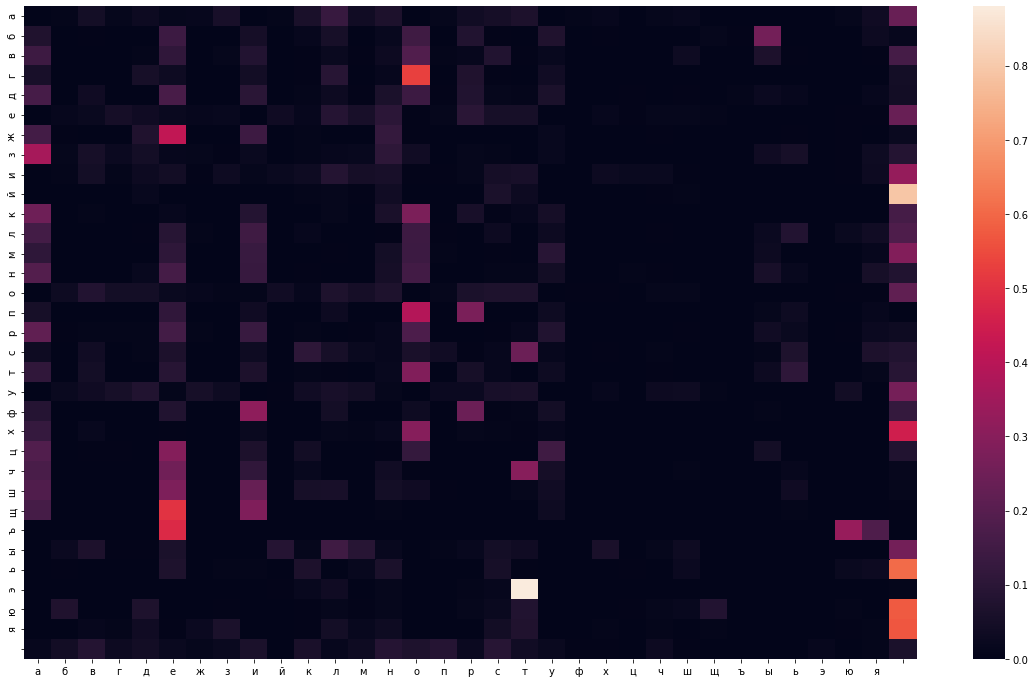

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(df)
plt.show()

удалим пробелы для построение корректной матрицы

In [17]:
# Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;
start = POS['п']
end = POS['р']
prior = 1.0 / len(RUSSIAN)
output = []
for c in RUSSIAN:
    for d in RUSSIAN:
        # prior * p(п, a1) * p(a1, a2) * p(a2, р)
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
                output.append(''.join(['п', c, d, 'р']) + ' {:.10f}'.format(proba))
output[:15]

['паар 0.0000000140',
 'пабр 0.0000011441',
 'павр 0.0000011296',
 'пагр 0.0000015963',
 'падр 0.0000036476',
 'паер 0.0000019573',
 'пажр 0.0000000059',
 'пазр 0.0000011139',
 'паир 0.0000000326',
 'пайр 0.0000000510',
 'пакр 0.0000056357',
 'палр 0.0000000037',
 'памр 0.0000001278',
 'панр 0.0000001286',
 'паор 0.0000000491']

In [20]:
# Используя матрицу переходных вероятностей сгенерируем слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов
word = ['б']
length = 7
for i in range(length):
    index = POS[word[i]]
    next_char = np.random.choice(list(RUSSIAN_whitespace), p=probabilities[index])
    #if next_char != ' ':
    word.append(next_char)

print(''.join(s))

бы потск


— Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [24]:
df = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')['Count']

# Дифференцируем, чтобы убрать тренд
df_diff = np.diff(df, 1)

In [26]:
# Разделим на train test для проверки качества модели
train_values = df_diff[:90].reshape(-1, 1)
test_values = df_diff[90:].reshape(-1, 1)

In [31]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        n_iter=10000)
    model.fit(train_values)
    print (n, model.score(train_values).round())

1 -857.0
2 -854.0
3 -847.0
4 -836.0
5 -827.0
6 -819.0


Fitting a model with 98 free scalar parameters with only 90 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 90 data points will result in a degenerate solution.


7 -816.0
8 -806.0
9 -794.0


Fitting a model with 142 free scalar parameters with only 90 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 90 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 90 data points will result in a degenerate solution.


10 -791.0
11 -783.0
12 -763.0
13 -759.0


In [32]:
# обучим модель
model = GaussianHMM(n_components=10,
                        covariance_type="full",
                        n_iter=2000)
model.fit(train_values)
labels = model.predict(train_values)
means = np.zeros_like(train_values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]

Fitting a model with 119 free scalar parameters with only 90 data points will result in a degenerate solution.


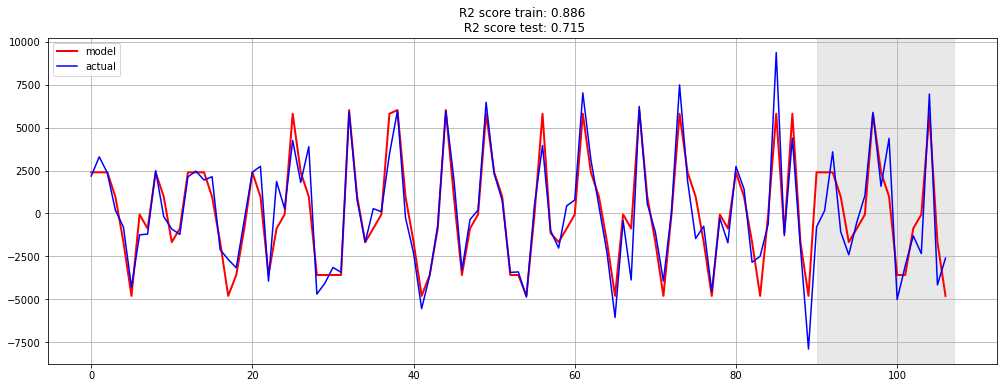

In [33]:
# Построим предсказание
predicted_labels = model.predict(test_values)
predicted_means = np.zeros_like(test_values)

for i in range(model.n_components):
    predicted_means[predicted_labels == i] = model.means_[i]
    
means_concatenated = np.concatenate([means, predicted_means])

error_train = r2_score(train_values, means)
error_test = r2_score(test_values, predicted_means)

plt.figure(figsize=(17, 6))
plt.title('R2 score train: {0:.3f}\n R2 score test: {1:.3f}'.format(error_train, error_test))
plt.plot(means_concatenated, linewidth=2, label="model", color='red')
plt.axvspan(train_values.shape[0], df_diff.shape[0], alpha=0.5, color='lightgrey')
plt.plot(df_diff, label="actual", color='blue')
plt.grid(True)
plt.legend()
plt.show();